# Proyecto Sprint 9

Analizaremos una tienda en línea junto con el equipo de marketing para encontrar las mejores hipótesis que puedan ayudar a mejorar los ingresos. 

Realizaremos un test A/B y analizaremos los resultados obtenidos. 

## Preparación de los datos

Vamos a preparar y limpiar nuestros datos, identificando duplicados y ausentes, así como conviertiendo datos al tipo de datos más útil para nuestro análisis.

### Cargar datos

In [1]:
# Cargamos todas las librerías
from scipy import stats as st
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
import math

In [2]:
# Cargamos los dataset
df_hypothesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';', header='infer')
df_orders = pd.read_csv('/datasets/orders_us.csv', header='infer')
df_visits = pd.read_csv('/datasets/visits_us.csv', header='infer')

### Descripción de los datos

**df_hypotheses**
* *Hypotheses*: breves descripciones de las hipótesis
* *Reach*: alcance del usuario, en una escala del uno a diez
* *Impact*: impacto en los usuarios, en una escala del uno al diez
* *Confidence*: confianza en la hipótesis, en una escala del uno al diez
* *Effort*: los recursos necesarios para probar una hipótesis, en una escala del uno al diez. 

**df_orders**
* *transactionId*: identificador de pedido
* *visitorId*: identificador del usuario que realizó el pedido
* *date*: fecha del pedido
* *revenue*: ingresos del pedido
* *group*: el grupo del test A/B al que pertenece el usuario

**df_visits**
* *date*: la fecha
* *group*: grupo del test A/B
* *visits*: el número de visitas en la fecha especificada para el grupo de test A/B especificado

#### df_hypothesis

In [3]:
# Imprimimos información general de df_hypothesis y verificamos si hay filas duplicadas
df_hypothesis.info()
print(df_hypothesis.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
0


In [4]:
#Mostramos el DataFrame
display(df_hypothesis)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


#### df_orders

In [5]:
# Imprimimos información general de df_orders y verificamos si hay filas duplicadas
df_orders.info()
print(df_orders.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB
0


In [6]:
# Mostramos los detalles del DataFrame
df_orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [7]:
#Mostramos el DataFrame
display(df_orders.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


#### df_visits

In [8]:
# Imprimimos información general de df_visits y verificamos si hay filas duplicadas
df_visits.info()
print(df_visits.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
0


In [9]:
# Mostramos los detalles del DataFrame
df_visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [10]:
#Mostramos el DataFrame
display(df_visits.head())

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Observaciones**
* En ninguno de los 3 DataFrames tenemos datos ausentes ni filas completamente duplicadas 
* Vamos a cambiar el tipo de datos a datetime de *date* en **df_orders** y **df_visits**
* Cambiaremos el nombre a snake case en **df_orders**

### Limpieza de datos

In [11]:
# Cambiamos el nombre de las columnas a snake_case
columns_new = {
    "transactionId": "transaction_id",
    "visitorId": "visitor_id"
}
df_orders = df_orders.rename(columns = columns_new)
print(df_orders.head())

   transaction_id  visitor_id        date  revenue group
0      3667963787  3312258926  2019-08-15     30.4     B
1      2804400009  3642806036  2019-08-15     15.2     B
2      2961555356  4069496402  2019-08-15     10.2     A
3      3797467345  1196621759  2019-08-15    155.1     B
4      2282983706  2322279887  2019-08-15     40.5     B


In [12]:
# Cambiamos el tipo de datos a datetime
df_orders['date'] = pd.to_datetime(df_orders['date'], format="%Y-%m-%d")
df_visits['date'] = pd.to_datetime(df_visits['date'], format="%Y-%m-%d")

## Priorizar hipótesis

### Recursos requeridos

In [13]:
# Cuanto mayor sea el valor Effort, más recursos requiere la prueba.
display(df_hypothesis[['Hypothesis','Effort','Reach']].sort_values(by='Effort', ascending=False).style.set_properties(**{'white-space': 'pre-wrap'}))


,Hypothesis,Effort,Reach
1,Launch your own delivery service. This will shorten delivery time,10,2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,8
0,Add two new channels for attracting traffic. This will bring 30% more users,6,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,5,10
8,Launch a promotion that gives users discounts on their birthdays,5,1
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,3,8
5,Add a customer review page. This will increase the number of orders,3,3
6,Show banners with current offers and sales on the main page. This will boost conversion,3,5
4,Change the background color on the main page. This will increase user engagement,1,3


### ICE (Impacto, Confianza y Esfuerzo)

In [14]:
# Obtenemos ICE
df_hypothesis['ICE']= (df_hypothesis['Impact'] * df_hypothesis['Confidence']) / df_hypothesis['Effort']
display(df_hypothesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False).style.set_properties(**{'white-space': 'pre-wrap'}))


,Hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


### RICE (Alcance, Impacto, Confianza y Esfuerzo)

In [15]:
df_hypothesis['RICE'] = (df_hypothesis['Reach'] * df_hypothesis['Impact']* df_hypothesis['Confidence']) / df_hypothesis['Effort']
display(df_hypothesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False).style.set_properties(**{'white-space': 'pre-wrap'}))


,Hypothesis,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,112.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,56.000000
0,Add two new channels for attracting traffic. This will bring 30% more users,40.000000
6,Show banners with current offers and sales on the main page. This will boost conversion,40.000000
8,Launch a promotion that gives users discounts on their birthdays,16.200000
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,9.000000
1,Launch your own delivery service. This will shorten delivery time,4.000000
5,Add a customer review page. This will increase the number of orders,4.000000
4,Change the background color on the main page. This will increase user engagement,3.000000


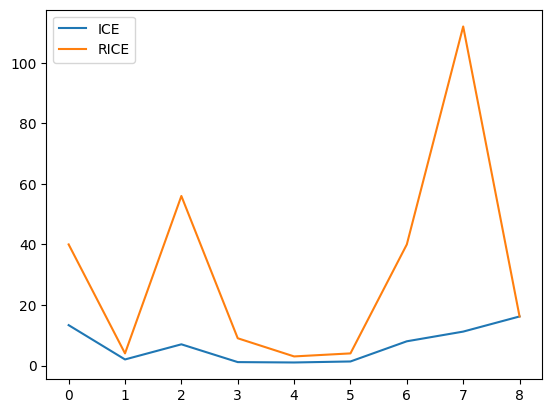

In [16]:
df_hypothesis.plot(y= ['ICE','RICE'])
plt.show()

**Observaciones**
* Teniendo en cuenta solo el ICE, podemos ver que las hipótesis 8, 0 y 7 son las más prometedoras, con valores por encima de 10. 
* Sin embargo al evaluar el RICE, la hipótesis 7 se duplica por encima de las demás hipótesis, esto debido a que tiene 10 de alcance. 
* La hipótesis 8 es la número 5 al medir RICE, a pesar de ser la #1 al medir ICE. Sucede de igual forma la hipótesis 2 ocupa el #2 en RICE pero el #5 en ICE.
* Gracias a lo anterior, podemos afirmar que las hipótesis más prometedoras son la **7** y la **0**:
    * 7: *Add a subscription form to all the main pages. This will help you compile a mailing list*  (Agrega un formulario de suscripción a todas las páginas principales. Esto nos ayudará a recopilar una lista de correos) 
    * 0: *Add two new channels for attracting traffic. This will bring 30% more users* (Agrega 2 canales nuevos para atraer tráfico. Esto traerá un 30% de más usuarios)

## Análisis de la prueba A/B

In [17]:
# Verificamos que no tengamos usuarios duplicados en los 2 grupos 
duplicates_id = df_orders.groupby('visitor_id')['group'].nunique().reset_index()
duplicates_id = duplicates_id[duplicates_id['group'] > 1]
print(duplicates_id.count())

visitor_id    58
group         58
dtype: int64


In [18]:
#Identificamos el revenue por grupo y número de transacciones por grupo
dup_orders = df_orders[df_orders['visitor_id'].isin(duplicates_id['visitor_id'])]
dup_orders1 = dup_orders.groupby(['visitor_id','group']).agg({'revenue':'sum','group':'count'})
print(dup_orders['visitor_id'].count())
print(dup_orders1)

181
                  revenue  group
visitor_id group                
8300375    A         30.5      1
           B        165.7      1
199603092  A        311.9      4
           B         55.7      1
232979603  A          5.9      1
...                   ...    ...
4186807279 B        505.9      2
4256040402 A        773.7      7
           B       1977.5      4
4266935830 A       1220.2      1
           B       1220.2      1

[116 rows x 2 columns]


In [19]:
df_orders2 = df_orders[np.logical_not(df_orders['visitor_id'].isin(duplicates_id['visitor_id']))]
print(df_orders2)

      transaction_id  visitor_id       date  revenue group
0         3667963787  3312258926 2019-08-15     30.4     B
1         2804400009  3642806036 2019-08-15     15.2     B
3         3797467345  1196621759 2019-08-15    155.1     B
4         2282983706  2322279887 2019-08-15     40.5     B
5          182168103   935554773 2019-08-15     35.0     B
...              ...         ...        ...      ...   ...
1191      3592955527   608641596 2019-08-14    255.7     B
1192      2662137336  3733762160 2019-08-14    100.8     B
1193      2203539145   370388673 2019-08-14     50.1     A
1194      1807773912   573423106 2019-08-14    165.3     A
1196      3936777065  2108080724 2019-08-15   3120.1     B

[1016 rows x 5 columns]


**Observaciones**
* Después de evaluar que los usuarios habían accedido más de 1 vez a las diferentes versiones, se decidió eliminar a los usuarios que formaron parte de ambos grupos ya que no quedará claro qué versión influyó en sus decisiones por lo que la fiabilidad de los resultados se verá comprometida.
* En total se eliminaron 181 transacciones de los 58 usuarios que formaron parte de ambos grupos 



### Ingreso acumulado

In [20]:
#Creamos una matriz con valores únicos de fecha-grupo 
dates_groups = df_orders2[['date','group']].drop_duplicates()


In [21]:
#Obtenemos los datos diarios acumulados agregados sobre los pedidos
orders_aggregated = dates_groups.apply(lambda x: df_orders2[np.logical_and(df_orders2['date'] <= x['date'], df_orders2['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
print(orders_aggregated.head())

          date group  transaction_id  visitor_id  revenue
55  2019-08-01     A              23          19   2266.6
66  2019-08-01     B              17          17    967.2
175 2019-08-02     A              42          36   3734.9
173 2019-08-02     B              40          39   3535.3
291 2019-08-03     A              66          60   5550.1


In [22]:
#Obtenemos los datos diarios acumulados agregados sobre los visitantes
visits_aggregated = dates_groups.apply(lambda x: df_visits[np.logical_and(df_visits['date'] <= x['date'], df_visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])
print(visits_aggregated.head())

          date group  visits
55  2019-08-01     A     719
66  2019-08-01     B     713
175 2019-08-02     A    1338
173 2019-08-02     B    1294
291 2019-08-03     A    1845


In [23]:
#Unimos los datos agregados en un solo DataFrame
cumulative_data = orders_aggregated.merge(visits_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'transactions', 'visitors', 'revenue', 'visits']
print(cumulative_data)

         date group  transactions  visitors  revenue  visits
0  2019-08-01     A            23        19   2266.6     719
1  2019-08-01     B            17        17    967.2     713
2  2019-08-02     A            42        36   3734.9    1338
3  2019-08-02     B            40        39   3535.3    1294
4  2019-08-03     A            66        60   5550.1    1845
..        ...   ...           ...       ...      ...     ...
57 2019-08-29     B           510       490  74576.7   17708
58 2019-08-30     A           460       437  52363.7   18037
59 2019-08-30     B           531       511  77863.5   18198
60 2019-08-31     A           468       445  53212.0   18736
61 2019-08-31     B           548       528  79651.2   18916

[62 rows x 6 columns]


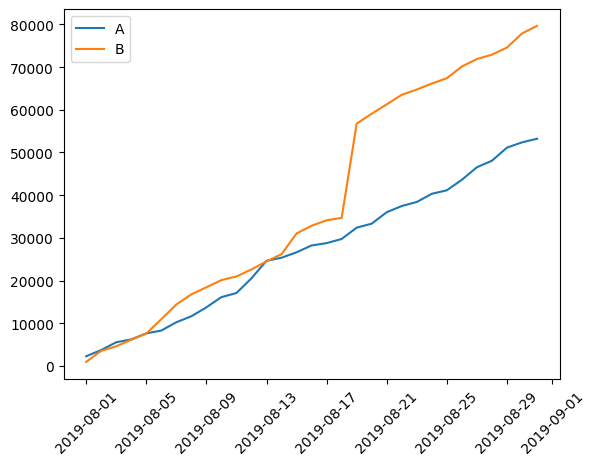

In [24]:
#Obtenemos datos por grupo
cumulative_revenueA = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'transactions']]
cumulative_revenueB = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'transactions']]

#Hacemos el gráfico
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='B')

plt.xticks(rotation=45)
plt.legend()

**Observaciones**
* Las transacciones de ambos grupos aumentan durante la prueba
* Al inicio de la prueba, el grupo A inició con mayores transacciones, sin embargo se mantuvo en segundo lugar excepto el 13 de Agosto de 2019 
* El grupo B tuvo un mayor ingreso acumulado en la mayoría de la prueba

### Tamaño de pedido promedio acumulado por grupo

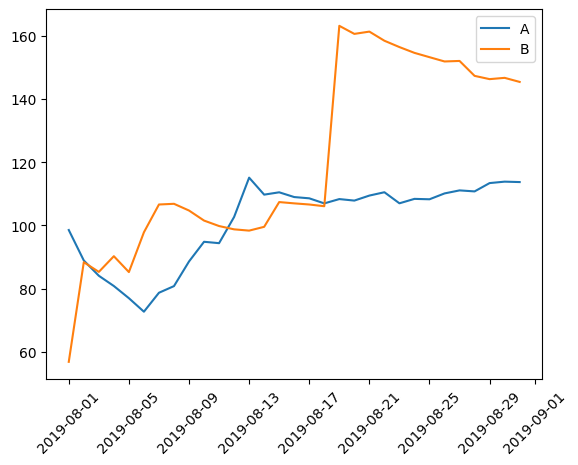

In [25]:
# Hacemos el gráfico
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue']/cumulative_revenueA['transactions'], label='A')

plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue']/cumulative_revenueB['transactions'], label='B')

plt.xticks(rotation=45)
plt.legend()

**Observaciones**
* El grupo A inició con mayor promedio de pedidos, sin embargo para los siguientes 5 días el promedio bajó casi un 50%, el promedio subió y llegó a su máximo para el 13 de Agosto, para después bajar y mantener un promedio por encima de 100 
* El grupo B tuvo una elevación de más de 20 pedidos en los primeros días, antes del día 9 el promedio subió más de 20 pedidos nuevamente. Alrededor del 13 bajó su promedio, pero para el 17 de Agosto subió nuevamente llegando al máximo de 160 pedidos en promedio, para comenzar a bajar a 140 pedidos. 
* Podemos suponer que al día 13 hubo un cambio en el grupo A para que superará al grupo B
* El Grupo B tuvo mayor promedio acumulado 

### Diferencia relativa en el tamaño de pedido promedio acumulado 

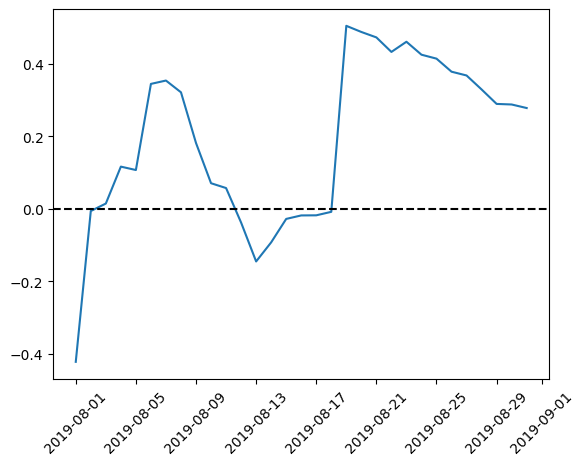

In [26]:
# Unimos los datos de los 2 grupos en un solo DataFrame 
merged_cumulative_revenue = cumulative_revenueA.merge(cumulative_revenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# Trazamos un gráfico de diferencia relativa para los tamaños de compra promedio
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['transactionsB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['transactionsA'])-1)

plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--')

**Observaciones**
* Podemos notar que al inicio de la prueba y al final el grupo B tiene mejores métricas
* Sin embargo para el 13 de Agosto, el grupo A tuvo mejor resultado, como habíamos observado en el tamaño promedio acumulado. 

### Tasa de conversión

        date group  transactions  visitors  revenue  visits  conversion
0 2019-08-01     A            23        19   2266.6     719    1.210526
2 2019-08-02     A            42        36   3734.9    1338    1.166667
4 2019-08-03     A            66        60   5550.1    1845    1.100000
6 2019-08-04     A            77        71   6225.6    2562    1.084507
8 2019-08-05     A            99        92   7623.6    3318    1.076087

        date group  transactions  visitors  revenue  visits  conversion
0 2019-08-01     A            23        19   2266.6     719    1.210526
2 2019-08-02     A            42        36   3734.9    1338    1.166667
4 2019-08-03     A            66        60   5550.1    1845    1.100000
6 2019-08-04     A            77        71   6225.6    2562    1.084507
8 2019-08-05     A            99        92   7623.6    3318    1.076087


(18109.0, 18140.0, 0.8, 1.4)

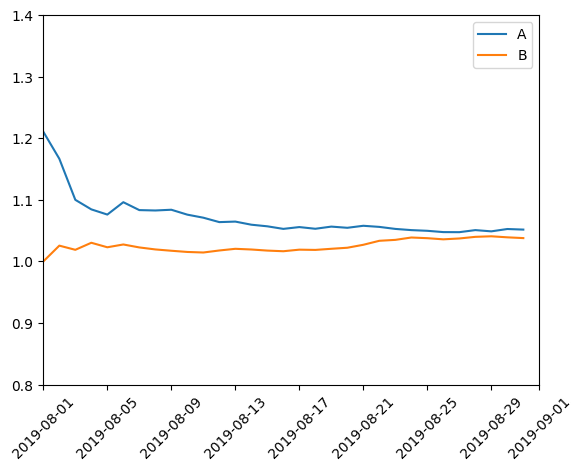

In [27]:
# Calculamos la tasa de conversión de cada grupo
cumulative_data['conversion'] = cumulative_data['transactions']/cumulative_data['visitors']

cumulative_dataA = cumulative_data[cumulative_data['group']=='A']
cumulative_dataB = cumulative_data[cumulative_data['group']=='B']
print(cumulative_dataA.head())
print()
print(cumulative_dataA.head())

# Trazamos los gráficos
plt.plot(cumulative_dataA['date'], cumulative_dataA['conversion'], label='A')
plt.plot(cumulative_dataB['date'], cumulative_dataB['conversion'], label='B')
plt.legend()
plt.xticks(rotation=45)
plt.axis([pd.to_datetime('2019-08-01'), pd.to_datetime('2019-09-01'), 0.8, 1.4])

**Observaciones**
* Notamos que al inicio el grupo A inició con una mejor conversión, sin embargo antes de los primeros 5 días tuvo un declive para después mantenerse entre 1 y 1.1
* Para el grupo B tuvo un pequeño aumento elos primeros 5 días, sin embargo se mantuvo con una tasa menor que el grupo A
* Debido a las métricas anteriores el grupo B llevaba mejores resultados, sin embargo mirando esta gráfica el grupo tiene mayor tasa de conversión y apesar de que bajó los primeros días se mantuvo con un tasa mayor que el grupo B. 

### Pedidos por usuario

In [28]:
#df_orders2 es el DataFrame sin los visitantes que formaban parte de los 2 grupos
order_per_user = df_orders2.groupby('visitor_id').agg({'transaction_id':'nunique'}).reset_index()
order_per_user.columns = ['visitor_id','transactions']
print(order_per_user.sort_values(by='transactions', ascending=False))

     visitor_id  transactions
908  3967698036             3
55    249864742             3
478  2108163459             3
687  2988190573             3
890  3908431265             3
..          ...           ...
331  1438226485             1
332  1452540367             1
333  1455323168             1
334  1455861274             1
972  4283872382             1

[973 rows x 2 columns]


#### Gráfico de dispersión

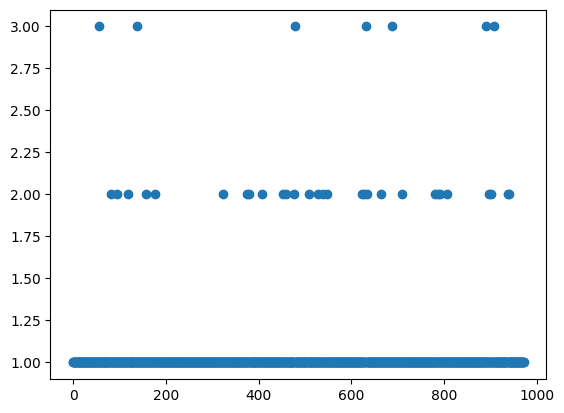

In [29]:
# Hacemos el gráfico de dispersión
dispersion_graph = pd.Series(range(0,len(order_per_user['transactions'])))

plt.scatter(dispersion_graph ,order_per_user['transactions'])


**Observaciones**
* Notamos que el máximo número de pedidos por usuario es de 3 pedidos, y son pocos los visitantes que hacen ese número de pedidos 
* La mayor parte de los viistantes sólo hacen 1 pedido y no es tan atípico que hagan 2 pedidos. 

#### Percentiles

In [30]:
# Calculamos los percentiles 95 y 99
percentile_order = np.percentile(order_per_user['transactions'], [95, 99])
print(percentile_order)

[1. 2.]


**Observaciones**
* No más del 5% de los visitantes hicieron más de 1 pedido
* Sólo el 1% hicieron más de 2 pedidos
* Gracias al gráfico de dispersión y los percentiles podemos fijar el umbral como normal de 1 a 2 pedidos y como anomalía 3 pedidos. 

### Precio por pedido

#### Gráfico de dispersión

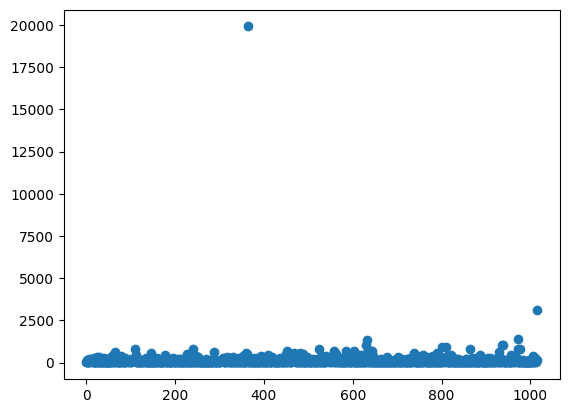

In [31]:
price_per_transaction = pd.Series(range(0,len(df_orders2['revenue'])))

plt.scatter(price_per_transaction, df_orders2['revenue'])


**Observaciones**
* Notamos que tenemos pedidos de más de 20000 lo cual parece ser una anomalía
* La mayoría de los pedidos son menores de 1000
* Tenemos pedidos mayor de 2000, lo cual parecen ser pedidos atípicos

#### Percentiles

In [32]:
percentile_rev = np.percentile(df_orders2['revenue'], [95, 99])
print(percentile_rev)


[414.275 830.3  ]


**Observaciones**
* No más del 5% de los visitantes hicieron más de 414.275
* Sólo el 1% hicieron más de 830.2
* Gracias al gráfico de dispersión y los percentiles podemos fijar que el precio de un pedido normal es menor de 414

### Significancia estadística de la diferencia en la conversión en datos brutos

In [33]:
# Obtenemos significancia estadística de la diferencia en la conversión entre los grupos sin eliminar las anomalías
orders_usersA = df_orders2[df_orders2['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_usersA.columns = ['visitor_id', 'orders']

orders_usersB = df_orders2[df_orders2['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_usersB.columns = ['visitor_id', 'orders']
print(orders_usersA.head())
print()
print(orders_usersB.head())

   visitor_id  orders
0    11685486       1
1    54447517       1
2    66685450       1
3    78758296       1
4    85103373       1

   visitor_id  orders
0     5114589       1
1     6958315       1
2    39475350       1
3    47206413       1
4    48147722       1


In [34]:
# Obtenemos las variables con usuarios de diferentes grupos y números de pedidos correspondientes
sampleA = pd.concat([orders_usersA['orders'],
pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_usersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([orders_usersB['orders'],
pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_usersB['orders'])), name='orders')],axis=0)

print(sampleA)
print()
print(sampleB)

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18736, dtype: int64

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18916, dtype: int64


In [35]:
#  Aplicamos la prueba de Mann-Whitney, y mostramos el valor p para comparar la conversión de los grupos
print("El valor p es: {0:.3f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

# Mostramos la diferencia relativa en la conversión entre los grupos
print("La diferencia relativa es: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1))


El valor p es: 0.011
La diferencia relativa es: 0.160


**Observaciones**
* El valor P es menor que 0.5 por lo que rechazaríamos la hipótesis nula 
* La ganancia de conversión relativa del grupo B en comparación con el grupo A es del 16%.

### Significancia estadística de la diferencia en el tamaño promedio de pedido con datos brutos

In [36]:
# Mostramos el valor p para comparar los tamaños de pedido promedio de los grupos.
print('El valor p es: {0:.3f}'.format(st.mannwhitneyu(df_orders2[df_orders2['group']=='A']['revenue'], df_orders2[df_orders2['group']=='B']['revenue'])[1]))

# Mostramos la ganancia relativa para el grupo B
print('La ganancia relativa es: {0:.3f}'.format(df_orders2[df_orders2['group']=='B']['revenue'].mean()/df_orders2[df_orders2['group']=='A']['revenue'].mean()-1))


El valor p es: 0.862
La ganancia relativa es: 0.278


**Observaciones**
* El valor p es mucho mayor que 0.05 por lo que no existen diferencias estadísticamente significativas entre los tamaños de pedido promedio de los grupos.
* El tamaño del pedido promedio del grupo B es un 27.8% mayor que el del grupo A

### Significancia estadística de la diferencia en la conversión en datos filtrados

In [37]:
# Obtenemos 2 variables, una de usuarios con más de 2 pedidos y una con pedidos mayores de 414
users_high_orders = pd.concat([orders_usersA[orders_usersA['orders'] > 2]['visitor_id'], orders_usersB[orders_usersB['orders'] > 2]['visitor_id']], axis = 0)

users_high_spend = df_orders2[df_orders2['revenue'] > 414]['visitor_id']

abnormal_users = pd.concat([users_high_orders, users_high_spend], axis =0).drop_duplicates().sort_values()

print(abnormal_users.head())


568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitor_id, dtype: int64


In [38]:
# Hacemos las variables por grupo filtrando los usuarios con más de 2 pedidos y de pedidos mayores de 414 
sampleA_filtered = pd.concat([orders_usersA[np.logical_not(orders_usersA['visitor_id'].isin(abnormal_users))]['orders']
                              ,pd.Series(0, index=np.arange(df_visits[df_visits['group']=='A']['visits'].sum() - len(orders_usersA['orders'])),name='orders')],axis=0)

sampleB_filtered = pd.concat([orders_usersB[np.logical_not(orders_usersB['visitor_id'].isin(abnormal_users))]['orders']
                              ,pd.Series(0, index=np.arange(df_visits[df_visits['group']=='B']['visits'].sum() - len(orders_usersB['orders'])),name='orders')],axis=0)
print(sampleA_filtered)
print()
print(sampleB_filtered)

0        1
1        1
2        1
3        1
4        1
        ..
18286    0
18287    0
18288    0
18289    0
18290    0
Name: orders, Length: 18709, dtype: int64

0        1
1        1
2        1
3        1
4        1
        ..
18383    0
18384    0
18385    0
18386    0
18387    0
Name: orders, Length: 18885, dtype: int64


In [39]:
#  Aplicamos la prueba de Mann-Whitney, y mostramos el valor p para comparar la conversión de los grupos filtrados 
p_value_conversion_filt = st.mannwhitneyu(sampleA_filtered, sampleB_filtered)[1].round(3)
print('El valor p en datos filtrados es:',p_value_conversion_filt)

# Mostramos la diferencia relativa en la conversión entre los grupos filtrados 
dif_relative_filt = (sampleB_filtered.mean()/sampleA_filtered.mean()-1).round(3)
print('La diferencia relativa en datos filtrados es:',dif_relative_filt)


El valor p en datos filtrados es: 0.012
La diferencia relativa en datos filtrados es: 0.182


**Observaciones**
* Aun con los datos filtrados, el valor P sigue siendo menor que 0.5 por lo que rechazaríamos la hipótesis nula 
* La ganancia de conversión relativa del grupo B en comparación con el grupo A es del 18%, en comparación con los datos sin filtrar subió un 2%

### Significancia estadística de la diferencia en el tamaño promedio de pedido con datos filtrados

In [40]:
#Mostramos el valor p para comparar los tamaños de pedido promedio de los grupos filtrados.

p_valueA_filt = df_orders2[np.logical_and(df_orders2['group']=='A', 
                              np.logical_not(df_orders2['visitor_id'].isin(abnormal_users)))]['revenue']
p_valueB_filt = df_orders2[np.logical_and(df_orders2['group']=='B',
                              np.logical_not(df_orders2['visitor_id'].isin(abnormal_users)))]['revenue']

p_value_order_filt = st.mannwhitneyu(p_valueA_filt,p_valueB_filt)[1].round(3) 
print('El valor p en datos filtrados es:',p_value_order_filt)

#Mostramos la ganancia relativa del grupo B
relative_revA_filt = df_orders2[np.logical_and(df_orders2['group']=='A',
        np.logical_not(df_orders2['visitor_id'].isin(abnormal_users)))]['revenue'].mean()
relative_revB_filt = df_orders2[np.logical_and(df_orders2['group']=='B',
        np.logical_not(df_orders2['visitor_id'].isin(abnormal_users)))]['revenue'].mean()

relative_revenue_filt = (relative_revB_filt / relative_revA_filt - 1).round(3)
print('La ganancia relativa en datos filtrados es:',relative_revenue_filt)

El valor p en datos filtrados es: 0.68
La ganancia relativa en datos filtrados es: -0.047


**Observaciones**
* Aun eliminando las anomalías y datos atípicos, el valor p es mucho mayor que 0.05 por lo que no existen diferencias estadísticamente significativas entre los tamaños de pedido promedio de los grupos.
* Sin embargo los datos filtrados sí afectaron el tamaño promedio, ya que tenemos una diferencia de 4% siendo el grupo A mayor que el grupo B
* Teniendo en cuenta que sin filtrar los datos, el grupo B tenía un tamaño promedio de 27% mayor que el A, podemos suponer que el grupo B tenía muchos datos atípicos 

## Conclusiones

* Al analizar los datos sin procesar, el grupo B llevaba la delantera tanto en conversión como en tamaño promedio
* Al analizar los datos ya filtrados, el grupo B imcrementó la diferencia relativa en conversión, sin embargo resultó ser menor su tamaño promedio por sólo 4%
* Al revisar tanto el ingreso acumulado, el tamaño promedio acumulado, el grupo B llevó la delantera 
* La mayoría de los usuarios hace 1 pedido, esta prueba duró 1 mes, por lo que asumimos que nuestra tienda en línea es de compras mensuales 
* Por todo lo anterior, concluimos que a pesar que el grupo B va liderando como el ganador, queremos extender la prueba 1 mes más, debido al ciclo de compra de nuestra tienda en línea 

*Nota adicional: revisar si alrededor del 13 de Agosto hubo alguna eventualidad, ya que se vió un cambio en el ingreso y el tamaño de pedido.*
